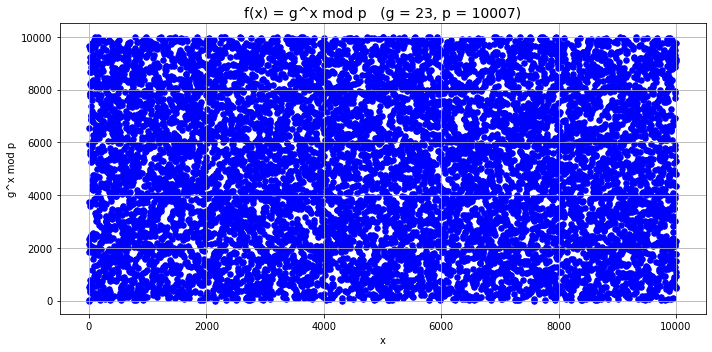

In [6]:
import matplotlib.pyplot as plt

# Parameters
p = 10007
g = 23

# Values
x_vals = list(range(p - 1))
y_vals = [pow(g, x, p) for x in x_vals]

# Plot
plt.figure(figsize=(10, 5))
plt.scatter(x_vals, y_vals, color='blue', s=30)

# Safer title with no LaTeX interpolation inside formatted string
plt.title(f"f(x) = g^x mod p   (g = {g}, p = {p})", fontsize=14)

plt.xlabel("x")
plt.ylabel("g^x mod p")
plt.grid(True)
plt.tight_layout()
plt.show()



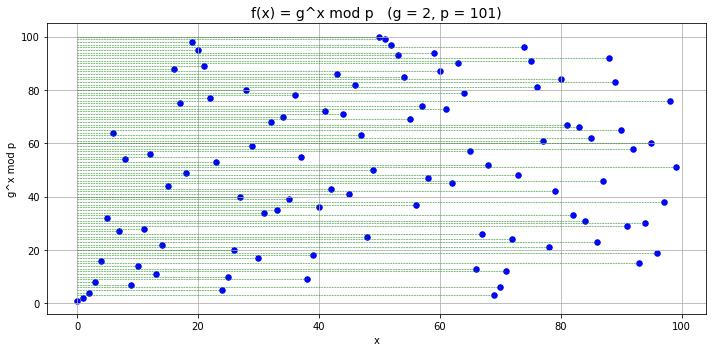

In [7]:
import matplotlib.pyplot as plt

# Parameters
p = 101
g = 2

# Values
x_vals = list(range(p - 1))
y_vals = [pow(g, x, p) for x in x_vals]

# Plot
plt.figure(figsize=(10, 5))

# Scatter plot of the modular exponentiation
plt.scatter(x_vals, y_vals, color='blue', s=30, label='y = g^x mod p')

# Add green horizontal lines from (0, y) to (x, y)
for x, y in zip(x_vals, y_vals):
    plt.plot([0, x], [y, y], color='green', linestyle='--', linewidth=0.5)

# Titles and labels
plt.title(f"f(x) = g^x mod p   (g = {g}, p = {p})", fontsize=14)
plt.xlabel("x")
plt.ylabel("g^x mod p")
plt.grid(True)
plt.tight_layout()
plt.show()


AttributeError: module 'matplotlib.pyplot' has no attribute 't'

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 128272 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 128272 missing from current font.
  font.set_text(s, 0, flags=flags)


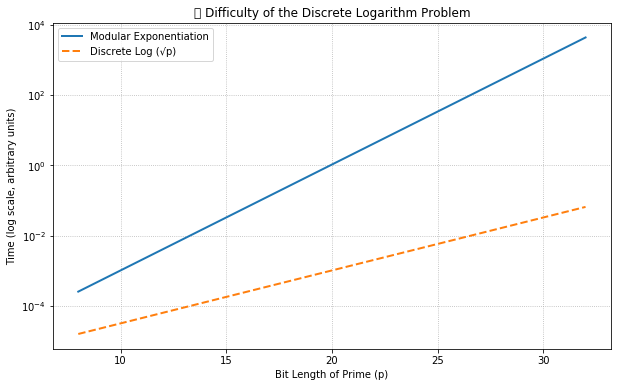

In [3]:
### 🔐 Visualizing the Difficulty of the Discrete Logarithm Problem

import matplotlib.pyplot as plt
import numpy as np

# Bit lengths for primes
bit_lengths = np.arange(8, 33, 2)  # from 8 to 32 bits

# Corresponding group sizes
group_sizes = 2 ** bit_lengths

# "Fast" operation: modular exponentiation (linear time)
modexp_time = group_sizes * 1e-6  # arbitrary small unit time

# "Hard" operation: brute-force or baby-step giant-step (O(sqrt(p)))
dlog_time = np.sqrt(group_sizes) * 1e-6

plt.figure(figsize=(10, 6))
plt.plot(bit_lengths, modexp_time, label="Modular Exponentiation", lw=2)
plt.plot(bit_lengths, dlog_time, label="Discrete Log (√p)", lw=2, linestyle='--')

plt.yscale("log")
plt.xlabel("Bit Length of Prime (p)")
plt.ylabel("Time (log scale, arbitrary units)")
plt.title("🔐 Difficulty of the Discrete Logarithm Problem")
plt.grid(True, which='both', ls=':')
plt.legend()
plt.t


In [1]:
def greatestCommonDivisor(m, n):
    if(n == 0): return m
    return greatestCommonDivisor(n, m % n)

In [2]:
greatestCommonDivisor(1432,123211)

1

In [3]:
### Extended Euclidean Algorithm — Large Integer Optimized

#Function: Extended GCD (silent, big integer-friendly)
def extended_gcd(a, b):
    """
    Returns a tuple (gcd, x, y) such that:
    a * x + b * y == gcd == gcd(a, b)
    Handles very large integers efficiently.
    """
    old_r, r = a, b
    old_s, s = 1, 0  # Coefficients for a
    old_t, t = 0, 1  # Coefficients for b

    while r != 0:
        quotient = old_r // r
        old_r, r = r, old_r - quotient * r
        old_s, s = s, old_s - quotient * s
        old_t, t = t, old_t - quotient * t

    return old_r, old_s, old_t

In [4]:
extended_gcd(1432,123211)

(1, -22973, 267)

In [5]:
1432*-22973+267*123211

1

In [8]:
# Example: Compute gcd and Bézout coefficients with large integers
a = 2**2048 + 1
b = 2**1024 + 12345
gcd, x, y = extended_gcd(a, b)

print("\nExtended GCD is successful for large integers:")
print(f"gcd = {gcd}")
print(f"coefficients = {x,y}")
print(a*x+b*y)


Extended GCD is successful for large integers:
gcd = 1
coefficients = (63113517865286316447241126476127241393872428037354379282002322652121174797665525810387151846028594357576758889439831894682258989227120865496381709092473278742506570800889900722552867080672517189744457315426955613501647890567448986125559816049920915631545955065305002309908708135072226529565686685666369618127, -11345873778343533846935073627856046443139471118926098849445120195204331125169986245846595138789163201572510598814390756029097065145006481600976176385434987746908425765065288176662427404583811639277699093298377380312931089549097804385047950282018196397345287810491557927638438353040341612991537221098085447128946660503251970805032086854214432209362578615902212390553253114636094448873563339169657974871135832981696524367823486558409464367241296976168899276640831964437857401151593346244166987823607494812657647969951979367215264599979648359787299240813358640099730992938880135512313590329821464633968610133949086640958

In [1]:
def fast_mod_exp(a, b, m):
    result = 1
    a = a % m
    steps = []
    while b > 0:
        steps.append((b, a, result))
        if b % 2 == 1:
            result = (result * a) % m
        a = (a * a) % m
        b = b // 2
    return result, steps


In [2]:
fast_mod_exp(2, 234, 190)

(134,
 [(234, 2, 1),
  (117, 4, 1),
  (58, 16, 4),
  (29, 66, 4),
  (14, 176, 74),
  (7, 6, 74),
  (3, 36, 64),
  (1, 156, 24)])

Python has its own implementation of fast modular exponentiation: 

In [3]:
pow(2, 234, 190)  # This is fast modular exponentiation!

134

In [4]:

# 🔧 Function: Extended GCD
def extended_gcd(a, b):
    """
    Returns a tuple (gcd, x, y) such that:
    a * x + b * y == gcd == gcd(a, b)
    """
    old_r, r = a, b
    old_s, s = 1, 0  # Coefficients for a
    old_t, t = 0, 1  # Coefficients for b

    print(f"\n🔍 Starting extended_gcd({a}, {b})")
    while r != 0:
        quotient = old_r // r
        print(f"\n▶️ quotient = {old_r} // {r} = {quotient}")
        print(f"   → r: {old_r} = {quotient} * {r} + {old_r - quotient * r}")

        old_r, r = r, old_r - quotient * r
        old_s, s = s, old_s - quotient * s
        old_t, t = t, old_t - quotient * t

        print(f"   → Now: gcd = {old_r}, x = {old_s}, y = {old_t}")

    print(f"\n✅ Result: gcd = {old_r}, x = {old_s}, y = {old_t}")
    return old_r, old_s, old_t

# 🧪 Example: Compute gcd and Bézout coefficients
a, b = 99, 78
gcd, x, y = extended_gcd(a, b)

print(f"\n➡️ Final Check:")
print(f"   {a}*({x}) + {b}*({y}) = {a*x + b*y}")
assert a * x + b * y == gcd



🔍 Starting extended_gcd(99, 78)

▶️ quotient = 99 // 78 = 1
   → r: 99 = 1 * 78 + 21
   → Now: gcd = 78, x = 0, y = 1

▶️ quotient = 78 // 21 = 3
   → r: 78 = 3 * 21 + 15
   → Now: gcd = 21, x = 1, y = -1

▶️ quotient = 21 // 15 = 1
   → r: 21 = 1 * 15 + 6
   → Now: gcd = 15, x = -3, y = 4

▶️ quotient = 15 // 6 = 2
   → r: 15 = 2 * 6 + 3
   → Now: gcd = 6, x = 4, y = -5

▶️ quotient = 6 // 3 = 2
   → r: 6 = 2 * 3 + 0
   → Now: gcd = 3, x = -11, y = 14

✅ Result: gcd = 3, x = -11, y = 14

➡️ Final Check:
   99*(-11) + 78*(14) = 3


In [9]:
### Extended Euclidean Algorithm — Large Integer Optimized

# 🔧 Function: Extended GCD (silent, big integer-friendly)
def extended_gcd(a, b):
    """
    Returns a tuple (gcd, x, y) such that:
    a * x + b * y == gcd == gcd(a, b)
    Handles very large integers efficiently.
    """
    old_r, r = a, b
    old_s, s = 1, 0  # Coefficients for a
    old_t, t = 0, 1  # Coefficients for b

    while r != 0:
        quotient = old_r // r
        old_r, r = r, old_r - quotient * r
        old_s, s = s, old_s - quotient * s
        old_t, t = t, old_t - quotient * t

    return old_r, old_s, old_t

# 🧪 Example: Compute gcd and Bézout coefficients with large integers
a = 2**2048 + 1
b = 2**1024 + 12345
gcd, x, y = extended_gcd(a, b)

# ✅ Final Check
assert a * x + b * y == gcd, "Bézout identity does not hold!"
print("\n✅ Extended GCD successful for large integers.")
print(f"gcd = {gcd}")
print(f"coefficients = {x,y}")
print(a*x+b*y)


✅ Extended GCD successful for large integers.
gcd = 1
coefficients = (63113517865286316447241126476127241393872428037354379282002322652121174797665525810387151846028594357576758889439831894682258989227120865496381709092473278742506570800889900722552867080672517189744457315426955613501647890567448986125559816049920915631545955065305002309908708135072226529565686685666369618127, -11345873778343533846935073627856046443139471118926098849445120195204331125169986245846595138789163201572510598814390756029097065145006481600976176385434987746908425765065288176662427404583811639277699093298377380312931089549097804385047950282018196397345287810491557927638438353040341612991537221098085447128946660503251970805032086854214432209362578615902212390553253114636094448873563339169657974871135832981696524367823486558409464367241296976168899276640831964437857401151593346244166987823607494812657647969951979367215264599979648359787299240813358640099730992938880135512313590329821464633968610133949086640958)

In [9]:
(96601075195075186855-4899557160129458363)/(2**72-2**71)=0.038837103544416725

0.038837103544416725

In [11]:
2**1024

179769313486231590772930519078902473361797697894230657273430081157732675805500963132708477322407536021120113879871393357658789768814416622492847430639474124377767893424865485276302219601246094119453082952085005768838150682342462881473913110540827237163350510684586298239947245938479716304835356329624224137216

In [14]:
(Ln(2)*1024)/Ln(10)

NameError: name 'Ln' is not defined

In [17]:
import numpy as np

In [20]:
np.log(2)*1024/np.log(10)

308.2547155599167

In [23]:
1/(512*np.log(2))

0.0028177637517362566

In [24]:
1/354.

0.002824858757062147

In [1]:
B = 64  # block size in bytes
ipad = bytes([0x36] * B)
opad = bytes([0x5C] * B)
ipad

b'6666666666666666666666666666666666666666666666666666666666666666'

In [2]:
opad

b'\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\'